Métodos para serem implementados com os dados

Primeiro passo: Escolher conjunto de dados para achar moda, mediana, quartis, média.

Criar um boxplot para algum atributo.

Colocar alguns questionamentos sobre os dados dentro do texto. Por exemplo qual a quantidade de produtos vendidos em cada mês? Qual a nota media dada pelos usuários para os produtos? etc.

Pegar algumas condições para demonstrar a probabilidade simples desse conjunto de dados.

Usar alguns ou algum método estatístico para demonstrar algum resultado.

Tentar colocar algum cálculo com intervalo de confiança.

Tentar colocar algum teste de hipótese no trabalho.

Tentar ver algo de regressão linear para os dados.

Estudar essas características como atributos.

Possíveis dados:
(customer dataset) Publico Alvo: Apenas cidade, estado e zipcode;
(seller dataset) Logística: Cidade/estado que mais vende/compra, zipcode;
(order payments) Forma de pagamento: forma, parcelas, valor...
(order items) Frete e data de entrega e valor do produto
(order review) Avaliação do cliente
(products dataset) categoria, dimensões e fotos


Avaliar as principais categorias de produtos comercializados.->
Avaliar qual produto que mais faz sentido para se investir em ecommerce no nordeste.
tendo a data de entrega 

Carregando os databases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import abspath

In [ ]:
customer = pd.read_csv(abspath('./data/olist_customers_dataset.csv'))
geo_location = pd.read_csv(abspath('./data/olist_geolocation_dataset.csv'))
items        = pd.read_csv(abspath('./data/olist_order_items_dataset.csv'))
payments     = pd.read_csv(abspath('./data/olist_order_payments_dataset.csv'))
reviews      = pd.read_csv(abspath('./data/olist_order_reviews_dataset.csv'))
orders       = pd.read_csv(abspath('./data/olist_orders_dataset.csv'))
products     = pd.read_csv(abspath('./data/olist_products_dataset.csv'))
sellers      = pd.read_csv(abspath('./data/olist_sellers_dataset.csv'))
translation  = pd.read_csv(abspath('./data/product_category_name_translation.csv'))

Função para obter informações dos dados

In [ ]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("O tamanho do dataframe é (linha, coluna): {}".format(dataframe.shape))
    print("**"*30)
    print("Informações: ",dataframe.info())
    print("**"*30)
    print("Número total de valores nulos: \n ",dataframe.isnull().sum())
    print("**"*30)
    
    return dataframe.head(3)

Por ex, obtendo infos de customers

In [ ]:
overview(reviews)

In [162]:
#zip_code_prefix column has different names in customer,geo_location,sellers dataframes
#Change these names to zip_code_prefix

customer.rename(columns = {"customer_zip_code_prefix":"zip_code_prefix"},inplace=True)
geo_location.rename(columns = {"geolocation_zip_code_prefix":"zip_code_prefix"},inplace=True)
sellers.rename(columns = {"seller_zip_code_prefix":"zip_code_prefix"},inplace=True)

#drop the duplicate values in geo_location (zip_code_prefix)

print("Number of rows before dropping duplicates in geo_location : ",geo_location.shape[0])
geo_location.drop_duplicates(subset="zip_code_prefix",keep="first",inplace=True)
print("Number of rows after dropping duplicates in geo_locations : ",geo_location.shape[0])

prod_item = pd.merge(items, products, on='product_id')

Number of rows before dropping duplicates in geo_location :  1000163
Number of rows after dropping duplicates in geo_locations :  19015


De onde vêm os compradores?

10


Text(0, 0.5, 'Cidade')

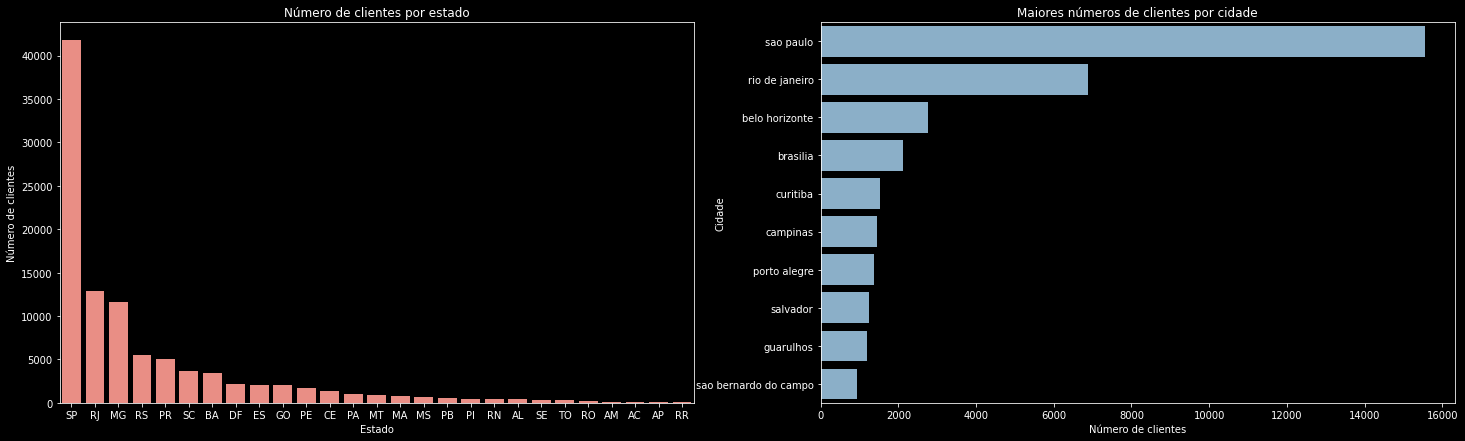

In [ ]:
# stat    
#     e_df = customer.groupby('customer_state').count()['customer_id'].reset_index()
#      city_df = customer.groupby('customer_city').count()['customer_id'].reset_index()

# plt.style.use('dark_background')
# plt.figure(figsize = (25,7))

# plt.subplot(121)
# base_color = sns.color_palette()[3]
# print(len(plt.rcParams['axes.prop_cycle']))

# sns.barplot(data = state_df.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id', color = base_color)
# plt.title('Número de clientes por estado')
# plt.xlabel('Estado')
# plt.ylabel('Número de clientes')

# plt.subplot(122)
# base_color = sns.color_palette()[4]

# sns.barplot(data = city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city', color = base_color)
# plt.title('Maiores números de clientes por cidade')
# plt.xlabel('Número de clientes')
# plt.ylabel('Cidade', labelpad = -30)

Items mais comprados

Text(0, 0.5, 'Produto')

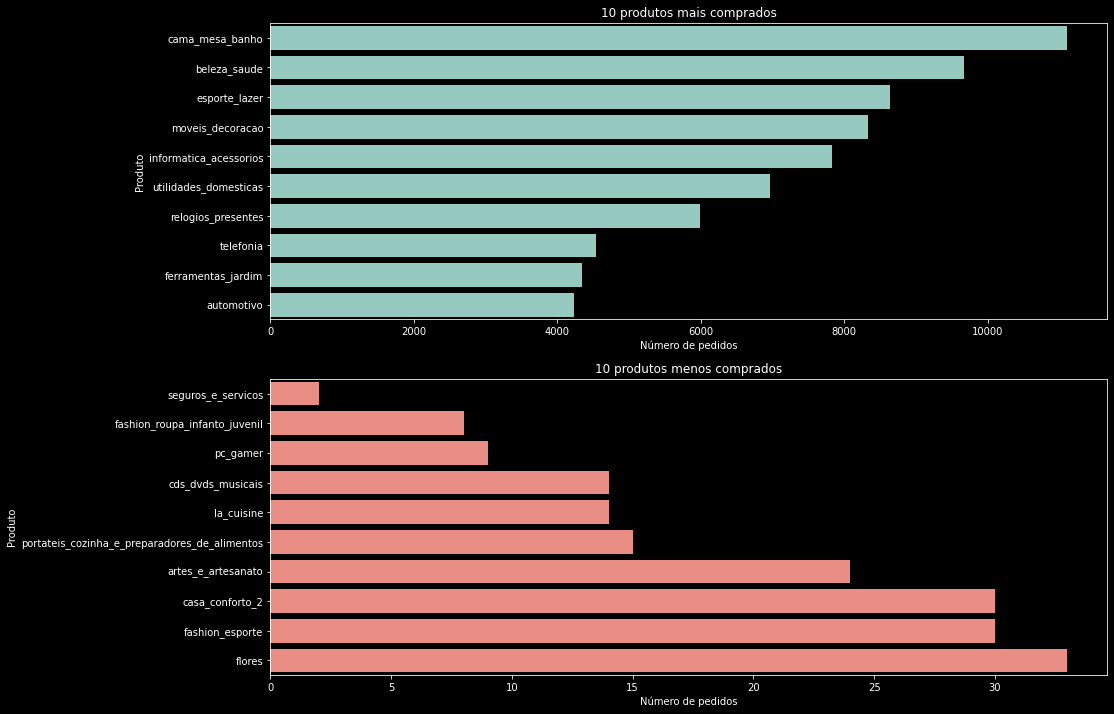

In [ ]:
top_products = prod_item['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = prod_item['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (15,12))
red_color = sns.color_palette()[3]
green_color = sns.color_palette()[0]

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index', color = green_color)
plt.title('10 produtos mais comprados')
plt.xlabel('Número de pedidos')
plt.ylabel('Produto')

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index', color = red_color)
plt.title('10 produtos menos comprados')
plt.xlabel('Número de pedidos')
plt.ylabel('Produto')

Produtos mais comprados

Text(0, 0.5, 'Total de pedidos')

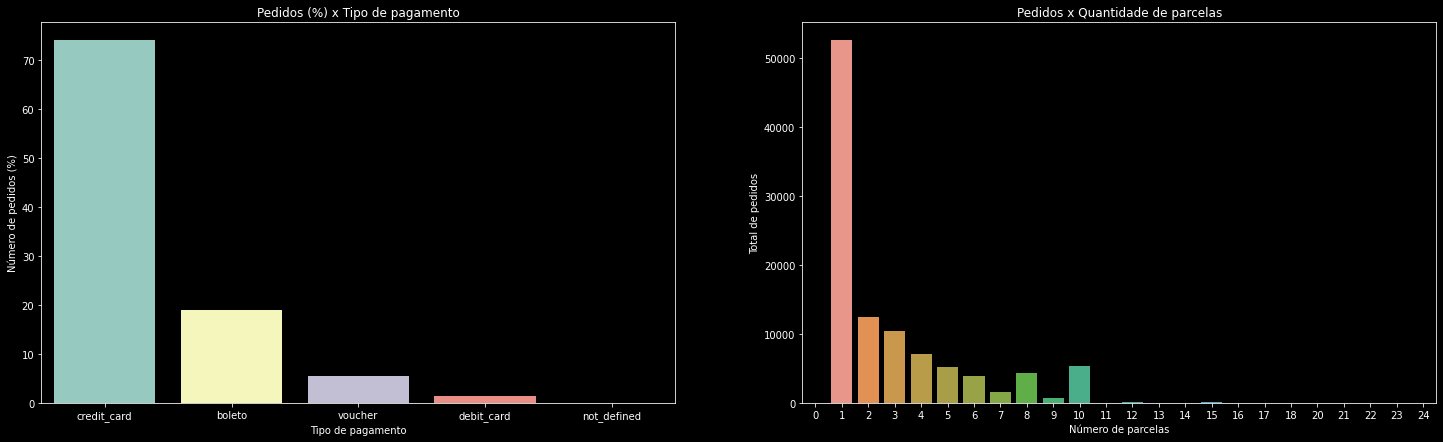

In [161]:
payments_types = payments['payment_type'].value_counts(normalize=True, dropna=True).reset_index()
payments_types['payment_type'] = payments_types['payment_type']*100
plt.figure(figsize = (25,7))

plt.subplot(121)
sns.barplot(data = payments_types, x = 'index', y = 'payment_type')
plt.title('Pedidos (%) x Tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de pedidos (%)')


plt.subplot(122)
sns.barplot(data = payments['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments')
plt.title('Pedidos x Quantidade de parcelas')
plt.xlabel('Número de parcelas')
plt.ylabel('Total de pedidos')

In [186]:
# customer merging with geo_location (left join to preserve customer info)
geo_customer = pd.merge(customer, geo_location,
                        how="left", on="zip_code_prefix")

# sellers merging with geo_locations (left join to preserve sellers info)
geo_seller = pd.merge(sellers, geo_location, how="left", on="zip_code_prefix")

# payment merging with order
payment_order = pd.merge(payments, orders, on="order_id")

# payment_order merging with reviews
pay_order_review = pd.merge(payment_order, reviews, on="order_id")

# pay_order_review merging with geo_customer
review_customer = pd.merge(pay_order_review, geo_customer, on="customer_id")

# prod_item merging with geo_seller
prod_item_seller = pd.merge(prod_item, geo_seller, on="seller_id")

# Finally review_customer with prod_item_seller
data = pd.merge(review_customer, prod_item_seller,
                on="order_id", suffixes=("_customer", "_seller"))

data.drop(['review_id', 'review_comment_title', 'review_comment_message',
          'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)


In [197]:
data.isnull().sum()
data["order_status"].value_counts()

delivered      115728
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64